<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Interpretation</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-figures" data-toc-modified-id="Creating-the-directory-for-the-figures-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Creating the directory for the figures</a></span></li><li><span><a href="#Getting-the-feature-importance-detected-by-random-forest" data-toc-modified-id="Getting-the-feature-importance-detected-by-random-forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Getting the feature importance detected by random forest</a></span></li><li><span><a href="#Plotting-the-Feature-Importance" data-toc-modified-id="Plotting-the-Feature-Importance-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Plotting the Feature Importance</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 2, Chapter 2, Section 5: Tree Based Models
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 3
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Tristin Johnson
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 3 for Tree Based Models (Part 2, Chapter 2, Section 5).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2020/slides/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models).
- Here we will work on kaggle competation kaggle competation [Ghouls, Goblins, and Ghosts... Boo!](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/overview).
- **The baseline for this assignment is 0.769772. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**

# Notebook Configuration

## Google drive

In [1]:
#from google.colab import drive
#import sys

# Mount Google Drive
#drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/Users/tjohnson/Documents/Machine Learning/Homework #3/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/Users/tjohnson/Documents/Machine Learning/Homework #3/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/Users/tjohnson/Documents/Machine Learning/Homework #3/'

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
#%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/Users/tjohnson/Documents/Machine Learning/Homework #3


## Loading the Data 

In [7]:
import pandas as pd

#load raw training data
df_raw_train = pd.read_csv(abspath_curr + 'train.csv')

#make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

#load raw test data
df_raw_test = pd.read_csv(abspath_curr + 'test.csv')

#make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

#get name of the target
target = 'type'

In [8]:
#print dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,371,7


In [9]:
#print dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,6


In [10]:
#print first 5 rows of df_train
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [11]:
#print first 5 rows of df_test
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


## Splitting the Data 

In [12]:
from sklearn.model_selection import train_test_split

#divide training data into 80% training and 20% validation
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

#reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [13]:
#print dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,296,7


In [14]:
#print dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,75,7


## Handling Uncommon Features 

In [15]:
#call common_var_checker to identify common variables
df_common_var = common_var_checker(df_train, df_val, df_test, target)

#print df_common_var
df_common_var

,common var
0,bone_length
1,color
2,hair_length
3,has_soul
4,id
5,rotting_flesh
6,type


In [16]:
#get features in the training data not in the validations or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

#print uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [17]:
#get features in validation data but not in training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

#print uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [18]:
#get feautres in test data but not in training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

#print uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [19]:
#remove uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

#print the first 5 rows of df_train
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,472,0.681615,0.529227,0.625242,0.615308,white,Ghoul
1,170,0.480836,0.407930,0.539005,0.495069,clear,Goblin
2,189,0.375197,0.742953,0.320764,0.243440,blue,Ghost
3,861,0.626017,0.172182,0.408422,0.644941,blue,Ghoul
4,30,0.250770,0.246258,0.554654,0.250036,black,Ghost


In [20]:
#remove uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

#print the first 5 rows of df_val
df_val.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,779,0.516004,0.527508,0.354857,0.760432,white,Ghoul
1,72,0.523729,0.318483,0.330146,0.427402,green,Goblin
2,29,0.500197,0.438418,0.532530,0.665522,clear,Ghoul
3,745,0.417300,0.377595,0.541834,0.349087,clear,Goblin
4,119,0.515275,0.582627,0.568721,0.534079,clear,Goblin


In [21]:
#remove uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

#print the first 5 rows of df_test
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


## Handling Identifiers 

In [22]:
#combine df_train, df_val, df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [23]:
#call id_checker on df to identify identifiers
df_id = id_checker(df)

#print first 5 rows of df_id
df_id.head()

,id
0,472
1,170
2,189
3,861
4,30


In [24]:
#removing identifiers
import numpy as np

#remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

#remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

#remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [25]:
#print first 5 rows of df_train
df_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.681615,0.529227,0.625242,0.615308,white,Ghoul
1,0.480836,0.407930,0.539005,0.495069,clear,Goblin
2,0.375197,0.742953,0.320764,0.243440,blue,Ghost
3,0.626017,0.172182,0.408422,0.644941,blue,Ghoul
4,0.250770,0.246258,0.554654,0.250036,black,Ghost


In [26]:
#print first 5 rows of df_val
df_val.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.516004,0.527508,0.354857,0.760432,white,Ghoul
1,0.523729,0.318483,0.330146,0.427402,green,Goblin
2,0.500197,0.438418,0.532530,0.665522,clear,Ghoul
3,0.417300,0.377595,0.541834,0.349087,clear,Goblin
4,0.515275,0.582627,0.568721,0.534079,clear,Goblin


In [27]:
#print first 5 rows of df_test
df_test.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


## No date time variables within this dataset

## Handling Missing Data 

In [28]:
#combine df_train, df_test, df_val
df = pd.concat([df_train, df_val, df_test], sort=False)

In [29]:
#call nan_checker on df to check for NaN Values
df_nan = nan_checker(df)

#print df_nan
df_nan

,var,proportion,dtype
0,type,0.587778,object


In [30]:
#print unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [31]:
#get variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == ['float64']].reset_index(drop=True)

#print df_miss
df_miss

,var,proportion,dtype


In [32]:
#separate the training data
df_train = df.iloc[:df_train.shape[0], :]

#separate the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

#separate the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [33]:
#print dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,296,6


In [34]:
#pritn dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,75,6


In [35]:
#print dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,6


In [36]:
#imputing missing values
from sklearn.impute import SimpleImputer

#if there are missing values
if len(df_miss['var']) > 0:
    
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    #impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

## Encoding the Data 

In [37]:
#combine df_train, df_val, df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

#print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,object


In [38]:
#call cat_var_checker on df to identify categorical variables
df_cat = cat_var_checker(df)

#print df_cat
df_cat

,var,nunique
0,color,6
1,type,4


## No need to remove categorical features because there are no features with large # of categories

In [39]:
#one-hot-enocde the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

#print the first 5 rows of df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.681615,0.529227,0.625242,0.615308,Ghoul,0,0,0,0,0,1
1,0.480836,0.407930,0.539005,0.495069,Goblin,0,0,0,1,0,0
2,0.375197,0.742953,0.320764,0.243440,Ghost,0,0,1,0,0,0
3,0.626017,0.172182,0.408422,0.644941,Ghoul,0,0,1,0,0,0
4,0.250770,0.246258,0.554654,0.250036,Ghost,1,0,0,0,0,0


In [40]:
#encode the categorical target
from sklearn.preprocessing import LabelEncoder

#call LabelEncoder
le = LabelEncoder()

#encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

#print the first 5 rows of df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.681615,0.529227,0.625242,0.615308,1,0,0,0,0,0,1
1,0.480836,0.407930,0.539005,0.495069,2,0,0,0,1,0,0
2,0.375197,0.742953,0.320764,0.243440,0,0,0,1,0,0,0
3,0.626017,0.172182,0.408422,0.644941,1,0,0,1,0,0,0
4,0.250770,0.246258,0.554654,0.250036,0,1,0,0,0,0,0


In [41]:
#separate the training data
df_train = df.iloc[:df_train.shape[0], :]

#separate the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

#separate the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [42]:
#print dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,296,11


In [43]:
#print dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,75,11


In [44]:
#print dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,11


## Splitting the Feature and Target 

In [45]:
#get feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

#get target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [46]:
#standardization
from sklearn.preprocessing import StandardScaler

#call StandardScaler
ss = StandardScaler()

In [47]:
#standardize the training data
X_train = ss.fit_transform(X_train)

#standardize the validation data
X_val = ss.transform(X_val)

#standardize the test data
X_test = ss.transform(X_test)

# Hyperparameter Tuning

In [48]:
#create dictionary of the models

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

In [49]:
#create dictionary of the piepelines

from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [50]:
#getting the predefined split cross-validator

X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [51]:
#GridSearchCV

param_grids = {}

In [52]:
#parameter grid for LogisticRegression

#the parameter grid of tol
tol_grid = [17 ** -5, 17 ** -4, 17 ** -3]

#the parameter grid of C
C_grid = [0.1, 1, 10]

#update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [53]:
#parameter grid for MLPClassifier

#the grids for alpha
alpha_grids = [4 ** i for i in range(-5, -2)]

#the grids for learning_rate_init
learning_rate_init_grids = [4 ** i for i in range(-4, -1)]

#update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [54]:
#parameter grid for Random Forest Classifer

#the grids for min_samples_split
min_samples_split_grids = [2, 40, 200]

#the grids for min_samples_leaf
min_samples_leaf_grids = [2, 20, 100]

#update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]


In [55]:
#parameter grid for Histogram-Based Gradient Boosting

#the grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

#the grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 10]

#update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [56]:
#create directory
directory = os.path.dirname(abspath_curr + '/result/ghosts/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [57]:
#tuning the hyperparameters

from sklearn.model_selection import GridSearchCV

#the list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

#for each model
for acronym in pipes.keys():
    #call GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    #fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    #update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    #sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    #get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    #move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    #write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/ghosts/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

#sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

#print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.781746,"{'model__alpha': 0.0009765625, 'model__learnin...","(MLPClassifier(alpha=0.0009765625, early_stopp..."
1,0.742561,"{'model__min_samples_leaf': 2, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."
2,0.735064,"{'model__C': 10, 'model__tol': 7.0429627772374...","(LogisticRegression(C=10, class_weight='balanc..."
3,0.731838,"{'model__learning_rate': 0.01, 'model__min_sam...",(HistGradientBoostingClassifier(learning_rate=...


# Model Selection

In [58]:
#get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [59]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/boo/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [60]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test['id'].to_numpy().reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target])                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/boo/submission/submission.csv', index=False)                                                                                                                                                                  

# Interpretation

## Creating the directory for the figures

In [61]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/boo/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the feature importance detected by random forest

In [62]:
#change best_score_params_estimator_gs[] from 3 to 1 as decision tree
#was second best model

# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[1]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,hair_length,0.37799
1,has_soul,0.265259
2,bone_length,0.183885
3,rotting_flesh,0.15154
4,color_clear,0.00469457


## Plotting the Feature Importance

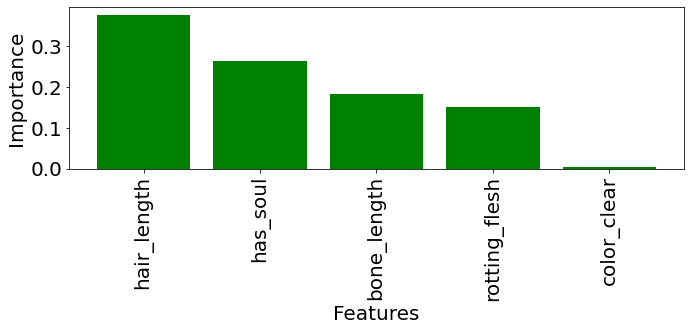

In [63]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/boo/figure/feature_importance_rfc.pdf')
plt.show()